In [1]:
from torchvision import transforms
from PIL import Image
import os,glob
from myfuc import *

%load_ext autoreload
%autoreload 2
%matplotlib inline

!pwd

/home/yy/kamome/Research


(224, 224)


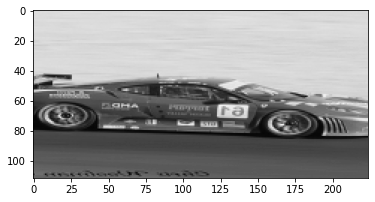

In [2]:
# bmp to np array.

plist=glob.glob("maetorch/imgs_resize/*")
# target_dir="/home/yy/kamome/PPWBv3.1/monoPGM/"
# os.makedirs(target_dir, exist_ok=True)
for p in plist[:3]:
    # LL,LH,LI=makeWT97(p)
    LI=makeWT97(p)
    break
plt.imshow(LI,"gray")

In [15]:
# Image.open(p)
LI.shape
# fwt97(LI,112,224)
fwt97(LI,224,112)

(112, 224)

In [25]:
a1 = -1.586134342
a2 = -0.05298011854
a3 = 0.8829110762
a4 = 0.4435068522

# Scale coeff:
k1 = 0.81289306611596146 # 1/1.230174104914
k2 = 0.61508705245700002 # 1.230174104914/2

In [27]:
width,height=[224,112]
s=LI.copy()
for col in range(width): # Do the 1D transform on all cols:
    # Predict 1. y1
    for row in range(1, height-1, 2):
        s[row][col] += a1 * (s[row-1][col] + s[row+1][col])   
    s[height-1][col] += 2 * a1 * s[height-2][col] # Symmetric extension
    
    # Update 1. y0
    for row in range(2, height, 2):
        s[row][col] += a2 * (s[row-1][col] + s[row+1][col])
    s[0][col] +=  2 * a2 * s[1][col] # Symmetric extension
    
    # Predict 2.
    for row in range(1, height-1, 2):
        s[row][col] += a3 * (s[row-1][col] + s[row+1][col])
    s[height-1][col] += 2 * a3 * s[height-2][col]
    
    # Update 2.
    for row in range(2, height, 2):
        s[row][col] += a4 * (s[row-1][col] + s[row+1][col])
    s[0][col] += 2 * a4 * s[1][col]

In [3]:
def fwt97_2d(m, nlevels=1):
    h,w = m.shape
    for i in range(nlevels):
        print(type(w),i)
        m = fwt97(m, w, h) # cols
        m = fwt97(m, w, h) # rows
        w /= 2
        h /= 2
    
    return m

In [66]:
[[0]*2 for i in range(3)],np.empty((3,2))

([[0, 0], [0, 0], [0, 0]],
 array([[  0.,  20.],
        [ 40.,  60.],
        [ 80., 100.]]))

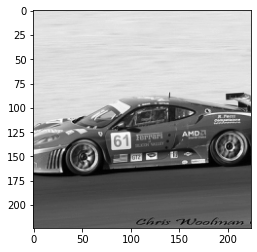

In [6]:
p0=Image.open(p)
p0=np.array(p0).astype(np.int)
plt.imshow(p0,"gray")

In [7]:
d=224

In [13]:
fwt97(p0,d,d)

(224, 224)


array([[211, 209, 209, ...,   0,   0,   0],
       [211, 210, 210, ...,   0,   0,   0],
       [211, 209, 209, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,  -1,   1,   0]])